In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error , mean_squared_log_error

df = pd.read_csv('C:\\Users\\Enes\\PycharmProjects\\PATIKA\\scores.csv')
print(df)

          number  days  gender    age  afftype  melanch  inpatient    edu  \
0    condition_1    11       2  35-39      2.0      2.0        2.0   6-10   
1    condition_2    18       2  40-44      1.0      2.0        2.0   6-10   
2    condition_3    13       1  45-49      2.0      2.0        2.0   6-10   
3    condition_4    13       2  25-29      2.0      2.0        2.0  11-15   
4    condition_5    13       2  50-54      2.0      2.0        2.0  11-15   
5    condition_6     7       1  35-39      2.0      2.0        2.0   6-10   
6    condition_7    11       1  20-24      1.0      NaN        2.0  11-15   
7    condition_8     5       2  25-29      2.0      NaN        2.0  11-15   
8    condition_9    13       2  45-49      1.0      NaN        2.0   6-10   
9   condition_10     9       2  45-49      2.0      2.0        2.0   6-10   
10  condition_11    14       1  45-49      2.0      2.0        2.0   6-10   
11  condition_12    12       2  40-44      1.0      2.0        2.0   6-10   

In [2]:
from sklearn.preprocessing import LabelEncoder, OneHotEncoder

le = LabelEncoder()

age = df.iloc[:,3].values
age = le.fit_transform(age)
age = pd.Series(age)

le = LabelEncoder()

edu = df.iloc[:,7]
edu = le.fit_transform(edu)
edu = pd.Series(edu)

for i in range(len(edu)):
    if edu[i] == 4:
        edu[i] = 0



df = pd.concat([df.iloc[:,:3] , age , df.iloc[:,4:7] , edu , df.iloc[:,8:]],axis=1)
df = df.dropna()
df = df.drop('number',axis=1)


In [3]:
x = df.iloc[:,:9].values
y = df.iloc[:,9:].values

In [4]:
from sklearn.model_selection import train_test_split

x_train , x_test , y_train , y_test = train_test_split(x , y , test_size = 0.33 , random_state = 15)

# Linear Regression

In [5]:
from sklearn.linear_model import LinearRegression
lr = LinearRegression()

lr.fit(x_train,y_train)
pred = lr.predict(x_test)

In [7]:
print("R2 =",lr.score(x_test,y_test))
print("RMSE =" , mean_squared_error(y_test,pred))

R2 = -4.897540036909828
RMSE = 89.70489490105697


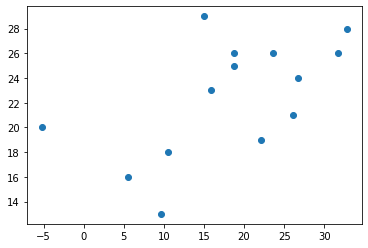

In [8]:
plt.scatter(pred,y_test)

# Polynomial Regression

In [9]:
from sklearn.preprocessing import PolynomialFeatures

poly_reg = PolynomialFeatures(degree=8) # derece yükselcikçe daha iyi sonuç veriyor
x_poly = poly_reg.fit_transform(x_test)
lin_reg = LinearRegression()
lin_reg.fit(x_poly,y_test)

pred = lin_reg.predict(x_poly)
print("R2 =",lin_reg.score(x_poly,y_test))
print("RMSE =" , mean_squared_error(y_test,pred))
print("RMSLE =" , mean_squared_log_error(y_test,pred))

R2 = 1.0
RMSE = 1.1291980386163626e-28
RMSLE = 1.5495482066841303e-31


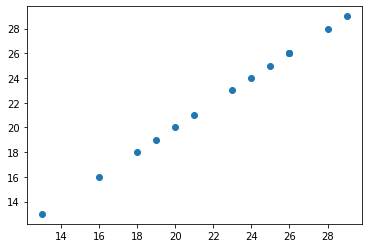

In [10]:
plt.scatter(pred,y_test)

# Random Forest

In [11]:
from sklearn.ensemble import RandomForestRegressor
r_rf = RandomForestRegressor(random_state=0 , n_estimators=10) # n_estimators kaçtane karar ağacı çizecegimizi belirler
r_rf.fit(x,y)
pred = r_rf.predict(x)

print("R2 =",r_rf.score(x,y))
print("RMSE =" , mean_squared_error(y,pred))
print("RMSLE =" , mean_squared_log_error(y,pred))


R2 = 0.7951385083868161
RMSE = 4.6217500000000005
RMSLE = 0.011930620879613303


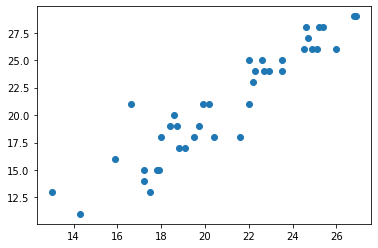

In [12]:
plt.scatter(pred,y)

# Decision Tree

R2 = 0.7951385083868161
RMSE = 0.0
RMSLE = 0.0


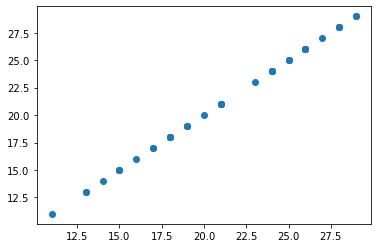

In [16]:
from sklearn.tree import DecisionTreeRegressor
r_dt = DecisionTreeRegressor(random_state = 0)
r_dt.fit(x,y)
pred = r_dt.predict(x)

print("R2 =",r_rf.score(x,y))
print("RMSE =" , mean_squared_error(y,pred))
print("RMSLE =" , mean_squared_log_error(y,pred))

plt.scatter(y,pred)
